In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


# Introduction

We aim to accomplish the following for this study:
1. Identify and visualize which factors contribute to customer churn:
2. Build a prediction model that will perform the following:
    - Classify if a customer is going to churn or not
    - Preferably and based on the model performance, choose a model that will attach a probability to the churn to 
    make it easier for customer service to target low hanging fruits in their efforts to orevent churn

### Acquire

In [2]:
# pandas reading csv and making dataframe out of it
bank_df = pd.read_csv('Churn_Modelling.csv')

In [3]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Prepare

In [6]:
# to get sum of nulls in each column
bank_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# to get unique values in each columns in bank_df
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# for customer churn for bank has nothing to do with RowNumber, CustomerId and Surname
# so let us drop those columns
bank_df = bank_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# seeing the distinct values in a given columns
bank_df.Exited.unique()

array([1, 0])

In [11]:
bank_df.CreditScore.unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [12]:
# converting the columns to lower case
bank_df.columns = bank_df.columns.str.lower()

In [13]:
bank_df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate to the "EXIT" status.

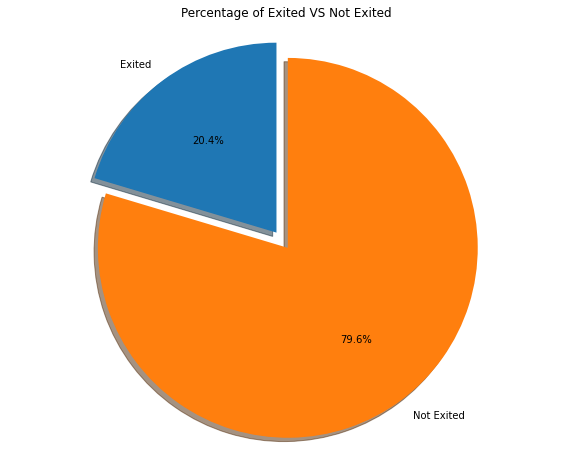

In [28]:
# Pie Chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Exited", "Not Exited"
sizes = [bank_df.exited[bank_df['exited'] == 1].count(), bank_df.exited[bank_df['exited'] == 0].count()]
explode = (0, 0.1) # only "explode" the 2nd slice
fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Exited VS Not Exited")
plt.show()

It looks like 20% of customers have churned. So the baseline model could be to predict that 20% of the customers will churn.

### countplot : Best for Categorical Data

We first review the status relationship with categorial variables

<AxesSubplot:xlabel='isactivemember', ylabel='count'>

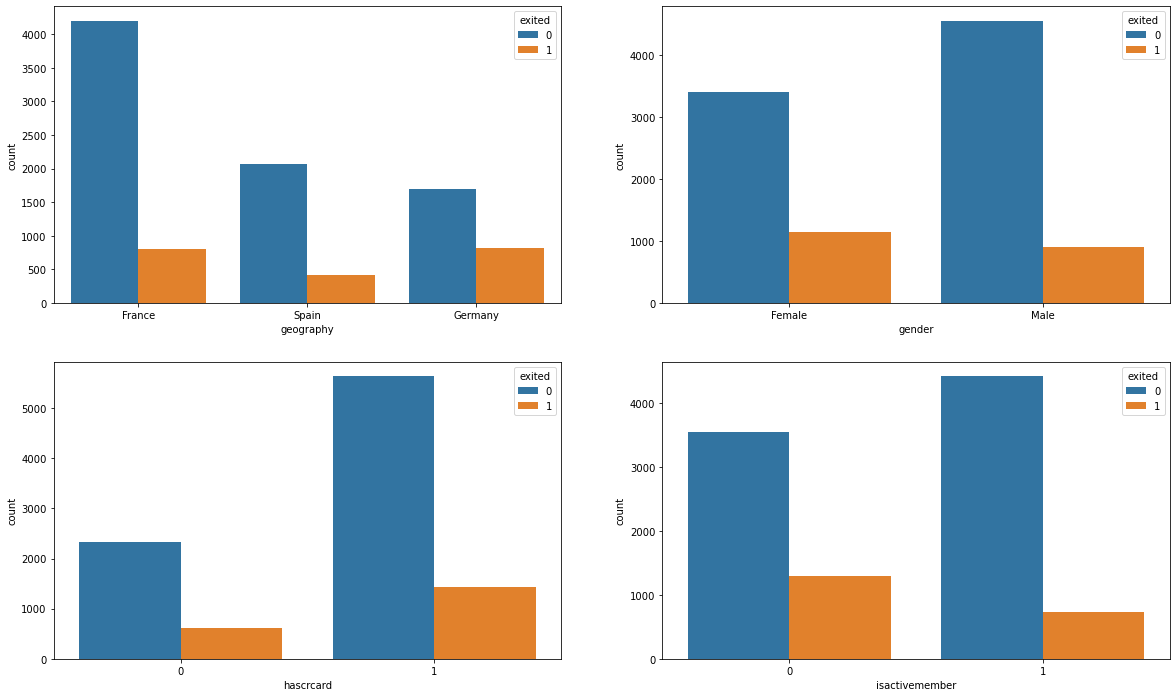

In [31]:
fig, axarr = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x = 'geography', hue = 'exited', data = bank_df, ax = axarr[0][0])
sns.countplot(x = 'gender', hue = 'exited', data = bank_df, ax = axarr[0][1])
sns.countplot(x = 'hascrcard', hue = 'exited', data = bank_df, ax = axarr[1][0])
sns.countplot(x = 'isactivemember', hue = 'exited', data = bank_df, ax = axarr[1][1])

##### Findings
1. Customers from France and Germany has more churn.
2. Female customer churn is more than male.
3. Customers with credit card has more churn.
4. Customers with hascredit card has more churn.


# boxplot : Continuous Data

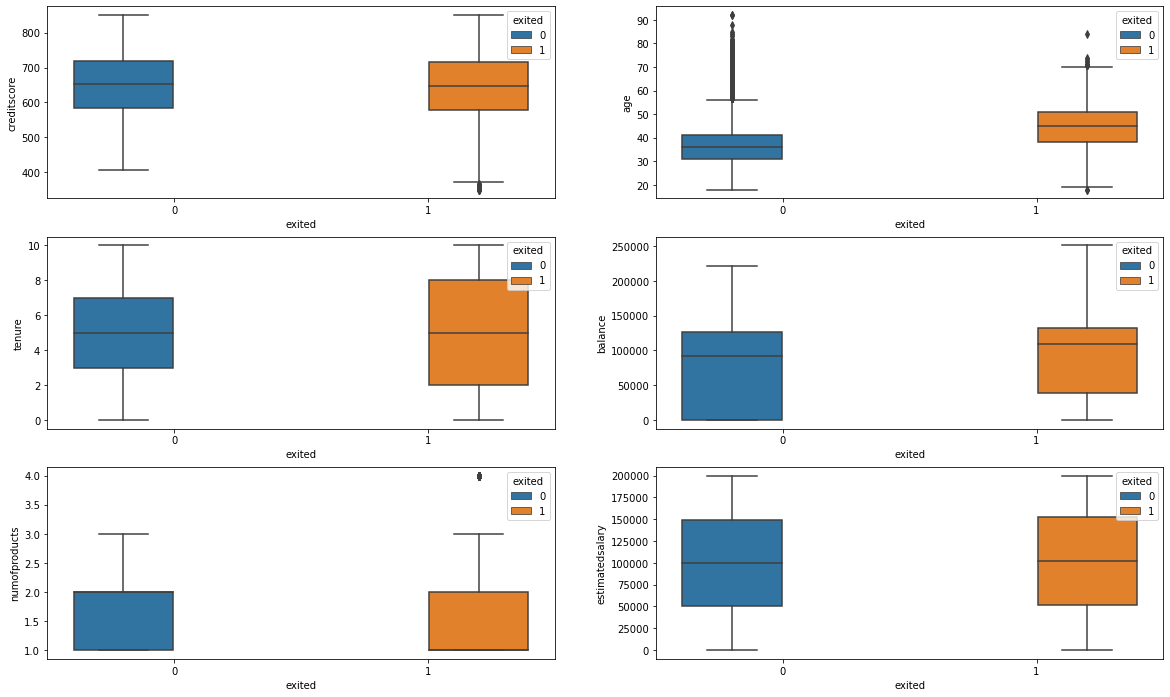

In [34]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize =(20, 12))

sns.boxplot(y = 'creditscore', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[0][0])
sns.boxplot(y = 'age', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[0][1])
sns.boxplot(y = 'tenure', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[1][0])
sns.boxplot(y = 'balance', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[1][1])
sns.boxplot(y = 'numofproducts', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[2][0])
sns.boxplot(y = 'estimatedsalary', x = 'exited', hue = 'exited', data = bank_df, ax = axarr[2][1])
plt.show()

###### Findings
1. There is no significance difference in credit score of customers that are churing and no churning.
2. From boxplot, we can say that customers with more age are churning more than less age. So bank needs to bring 
some good packages to keep retention rate low for elderly customers.
3. From the boxplot, we can say that customers with less and more tenure are leaving as the range in boxplot is 
scattered for churned customers. So we need to do something new for new customers and old customers as well to retain 
those customers.
4. Customers having more balance are churning more. So it will create lack of liquidity.
5. There is no significance difference between estimated salary of churned and unchurned customers.
6. There is some outliers in credit score, age, and num of products in data.

### Splitting Data

In [35]:
def split_bank_data(df):
    """This function will split the bank customer data, stratify churn,
    Returns train, validate and test dataframes."""
    train_validate, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.exited)
    train, validate = train_test_split(train_validate, test_size = 0.2, random_state = 123, 
                                       stratify =train_validate.exited)
    return train, validate, test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# spliting the data
train, validate, test = split_bank_data(bank_df)

In [38]:
print(train.shape)
print(validate.shape)
print(test.shape)

(6400, 11)
(1600, 11)
(2000, 11)


# Feature Engineering

We seek to add features that are likely to have an impact on the probabaility of churning.

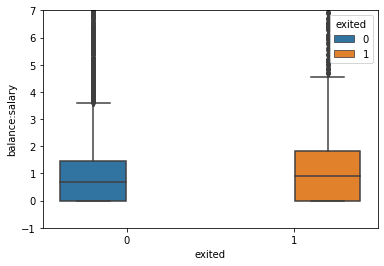

In [89]:
train["balance:salary"] = train.balance/train.estimatedsalary
sns.boxplot(y = 'balance:salary', x = 'exited', hue = 'exited', data = train)
plt.ylim(-1, 7)
plt.show()

We have seen that the salary has little effect on the chance of customer churning. However as seen above, the ratio
of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio chun more
which would be bad for business, as it will create lack of liquidity.

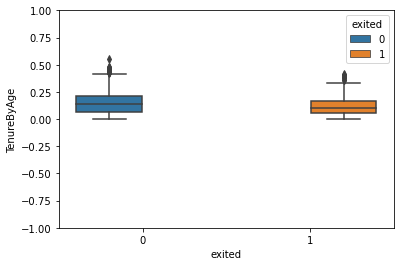

In [91]:
# Given that tenure is a function of age, we introduce a variable aiming to standardise tenure over age:
train['TenureByAge'] = train.tenure/train.age
sns.boxplot(y = 'TenureByAge', x = 'exited', hue = 'exited', data = train)
plt.ylim(-1, 1)
plt.show()


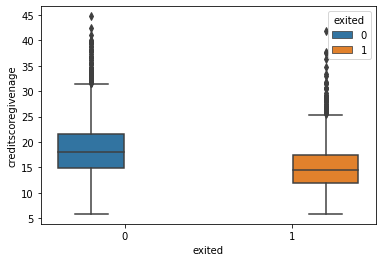

In [93]:
'''Lastly we introduce a varaible to capture credit score given age to take into account credit behaviour visavis 
adult life'''
train['creditscoregivenage'] = train.creditscore/train.age
sns.boxplot(y = 'creditscoregivenage', x = 'exited', hue = 'exited', data = train)
plt.show()

### Explore

- Is creditscore driving factor for customer churn?
- Is geography driving factor for customer churn?
- Is gender driving factor for customer churn?
- Is age driving factor for customer churn?
- Is tenure driving factor for customer churn?
- Is active member the driving factor for customer churn?

In [94]:
train.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,balance:salary,TenureByAge,creditscoregivenage
2960,778,Germany,Female,29,7,123229.46,1,1,0,181221.09,0,0.679995,0.241379,26.827586
5093,650,Germany,Female,55,2,140891.46,3,1,1,179834.45,1,0.783451,0.036364,11.818182
9730,586,Germany,Male,38,2,136858.42,1,0,1,189143.94,0,0.723568,0.052632,15.421053
477,611,France,Female,40,8,100812.33,2,1,0,147358.27,0,0.684131,0.200000,15.275000
9726,773,Spain,Male,43,7,138150.57,1,1,1,177357.16,0,0.778940,0.162791,17.976744


In [95]:
train.gender.unique()

array(['Female', 'Male'], dtype=object)

In [96]:
train.geography.unique()

array(['Germany', 'France', 'Spain'], dtype=object)

In [97]:
train.creditscore.unique()

array([778, 650, 586, 611, 773, 635, 527, 688, 759, 640, 724, 601, 642,
       531, 668, 711, 511, 624, 846, 513, 536, 689, 613, 554, 539, 753,
       581, 727, 529, 680, 521, 546, 596, 833, 850, 660, 608, 705, 719,
       747, 626, 574, 535, 589, 627, 621, 667, 588, 612, 512, 648, 522,
       507, 567, 645, 681, 745, 728, 678, 766, 543, 652, 796, 731, 510,
       712, 633, 544, 751, 685, 615, 675, 690, 703, 775, 631, 684, 479,
       565, 423, 813, 597, 656, 582, 494, 556, 604, 806, 618, 520, 733,
       564, 483, 519, 704, 477, 746, 657, 638, 808, 573, 655, 707, 602,
       445, 461, 487, 595, 607, 486, 547, 756, 828, 437, 677, 497, 616,
       709, 706, 623, 671, 793, 723, 630, 443, 754, 471, 669, 734, 698,
       501, 576, 696, 683, 739, 560, 687, 639, 767, 628, 718, 530, 619,
       641, 729, 716, 598, 614, 737, 637, 661, 651, 715, 770, 620, 603,
       413, 682, 665, 562, 834, 752, 782, 592, 568, 579, 702, 805, 744,
       662, 585, 460, 720, 462, 697, 700, 721, 557, 769, 763, 59

In [98]:
train.age.unique()

array([29, 55, 38, 40, 43, 37, 39, 26, 31, 33, 34, 35, 32, 69, 52, 23, 45,
       27, 54, 36, 51, 25, 30, 28, 92, 44, 50, 24, 46, 70, 48, 63, 59, 67,
       65, 64, 42, 41, 75, 47, 56, 62, 49, 19, 18, 58, 72, 22, 61, 53, 77,
       66, 60, 21, 57, 20, 71, 68, 80, 79, 74, 88, 76, 73, 78, 81, 84, 83,
       82])

In [99]:
train.tenure.unique()

array([ 7,  2,  8,  3,  9,  0,  4,  1,  6,  5, 10])

In [100]:
train.hascrcard.unique()

array([1, 0])

In [101]:
train.numofproducts.unique()

array([1, 3, 2, 4])

In [102]:
train.isactivemember.unique()

array([0, 1])

In [103]:
train.estimatedsalary.unique()

array([181221.09, 179834.45, 189143.94, ...,  91167.19,   9209.21,
        15470.91])

In [104]:
train.balance.unique()

array([123229.46, 140891.46, 136858.42, ..., 138341.51, 118448.15,
       105957.44])

In [105]:
train.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,balance:salary,TenureByAge,creditscoregivenage
2960,778,Germany,Female,29,7,123229.46,1,1,0,181221.09,0,0.679995,0.241379,26.827586
5093,650,Germany,Female,55,2,140891.46,3,1,1,179834.45,1,0.783451,0.036364,11.818182
9730,586,Germany,Male,38,2,136858.42,1,0,1,189143.94,0,0.723568,0.052632,15.421053
477,611,France,Female,40,8,100812.33,2,1,0,147358.27,0,0.684131,0.200000,15.275000
9726,773,Spain,Male,43,7,138150.57,1,1,1,177357.16,0,0.778940,0.162791,17.976744


In [106]:
col = ['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']

In [107]:
for item in col:
    print(item)

creditscore
geography
gender
age
tenure
balance
numofproducts
hascrcard
isactivemember
estimatedsalary
exited


### TBA

### Is creditscore driving factor for customer churn?

<AxesSubplot:xlabel='creditscore', ylabel='count'>

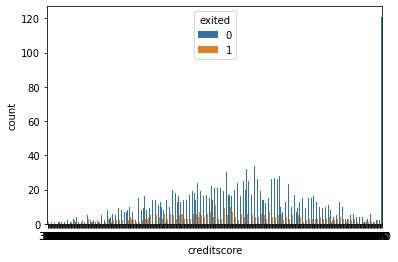

In [109]:
# Visualizing exited in training data set
sns.countplot(x = 'creditscore', hue = 'exited', data = train)

<AxesSubplot:xlabel='exited', ylabel='count'>

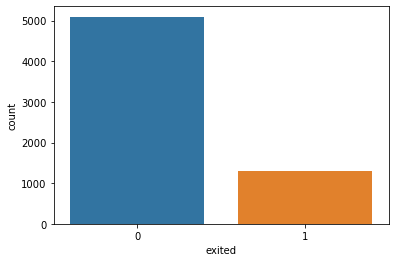

In [110]:
# Visualizing exited in training data set
sns.countplot(y = train['exited'])

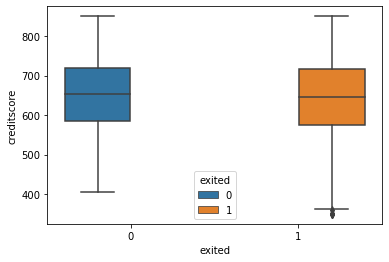

In [113]:
sns.boxplot(y = 'creditscore', x = 'exited', hue = 'exited', data = train)
plt.show()

We can run statistical test to check if there is difference of credit score between churn and unchurned customers.

###### Is geography driving factor for customer churn?

<AxesSubplot:xlabel='geography', ylabel='count'>

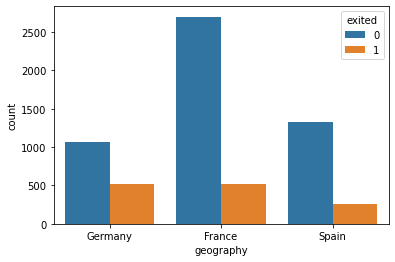

In [114]:
# visualize the churn count based on geography in training dataset
sns.countplot(x = 'geography', hue = 'exited', data = train)

### Is gender driving factor for customer churn?

<AxesSubplot:xlabel='gender', ylabel='count'>

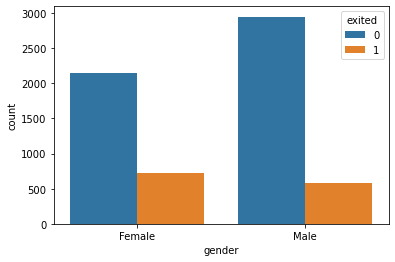

In [117]:
# visualize the churn count based on geography in training dataset
sns.countplot(x = 'gender', hue = 'exited', data = train)

### Is age driving factor for customer churn?

<AxesSubplot:xlabel='age', ylabel='count'>

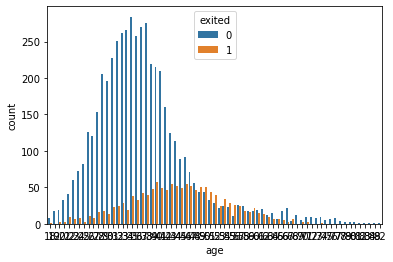

In [119]:
# visualize the churn count based on age in training dataset
sns.countplot(x = 'age', hue = 'exited', data = train)

<AxesSubplot:xlabel='exited', ylabel='age'>

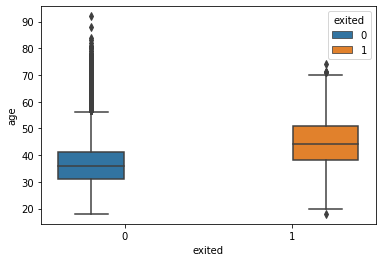

In [120]:
# creating a boxplot of age to see difference in churn by ages
sns.boxplot(y = 'age', x = 'exited', hue = 'exited', data = train)

Elderly population are churning more than younger counter part.

### Is tenure driving factor for customer churn?

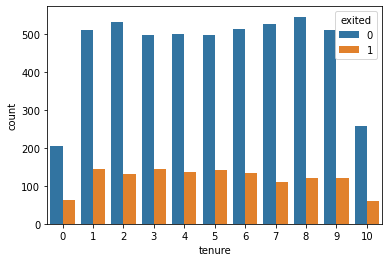

In [122]:
# visualize the churn count based on tenure in training dataset
sns.countplot(x = 'tenure', hue = 'exited', data = train)
plt.show()

<AxesSubplot:xlabel='exited', ylabel='tenure'>

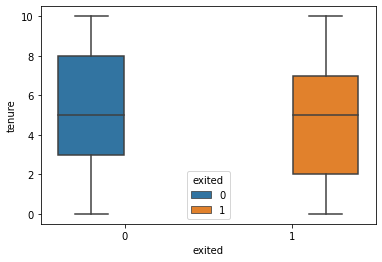

In [124]:
sns.boxplot(y = 'tenure', x = 'exited', hue = 'exited', data = train)

### Is active member the driving factor for customer churn?

In [ ]:
# visualize the churn count based on active member in training dataset
sns.countplot(x = 'isactivemember', hue = 'exited', data = train)

###  Do customers having credit card have more churn than one without credit card?

In [ ]:
sns.countplot(x = 'hascrcard', hue = 'exited', data = train)

#### Churn rate of customers by numbr of products?

In [ ]:
sns.countplot(x = 'numofproducts', hue = 'exited', data = train)

In [ ]:
train.head(1)

### Does average credit score changes for customers varies with exited vs non exited


In [ ]:
sns.boxplot(y = 'creditscore', x = 'exited', data = train)

### Does balance for customers varies with exited vs non exited

In [ ]:
sns.boxplot(y = 'balance', x = 'exited', data = train)

### Does estimated salary for customers varies with exited vs non exited

In [ ]:
sns.boxplot(y = 'estimatedsalary', x ='exited', data = train)

### Is there difference between the average age of customers that exited and non exited?

In [ ]:
sns.boxplot(y = 'age', x = 'exited', data = train)

# Histogram for exited vs non-exited with other parameters or variables

### creditscore

In [ ]:
sns.histplot(x ='creditscore', hue = 'exited', data = train)

### age

In [ ]:
plt.figure(figsize = (11, 7))
sns.histplot(x = 'age', hue = 'exited', data = train)

### tenure

In [ ]:
plt.figure(figsize = (11, 7))
sns.histplot(x = 'tenure', hue = 'exited', data = train)

In [ ]:
### balance